In [12]:
#Load the data 
import json
import pandas as pd

from pandas.io.json import json_normalize # use pd.json_normalize in pandas versions >= 1.0.0

# open the file
with open('logins.json') as file:
    data = json.load(file)

In [17]:
data

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [21]:
# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Now df is a DataFrame with the data from your dictionary
print(df)

                login_time
0      1970-01-01 20:13:18
1      1970-01-01 20:16:10
2      1970-01-01 20:16:37
3      1970-01-01 20:16:36
4      1970-01-01 20:26:21
...                    ...
93137  1970-04-13 18:50:19
93138  1970-04-13 18:43:56
93139  1970-04-13 18:54:02
93140  1970-04-13 18:57:38
93141  1970-04-13 18:54:23

[93142 rows x 1 columns]


In [22]:


# Convert the 'login_time' column to datetime
df['login_time'] = pd.to_datetime(df['login_time'])

# Set 'login_time' as the DataFrame index
df.set_index('login_time', inplace=True)

# Add a 'count' column to count each login
df['count'] = 1

# Resample and count logins per 15 minute interval
df_resampled = df.resample('15T').sum()

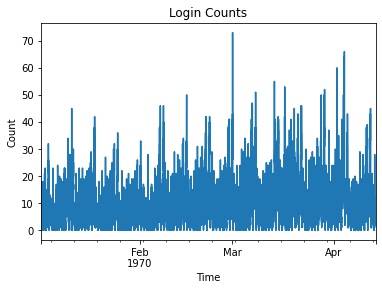

In [23]:
import matplotlib.pyplot as plt

# Assuming df_resampled is your DataFrame and it has a column named 'count'
df_resampled['count'].plot(kind='line')

plt.title('Login Counts')
plt.xlabel('Time')
plt.ylabel('Count')

# Show the plot
plt.show()



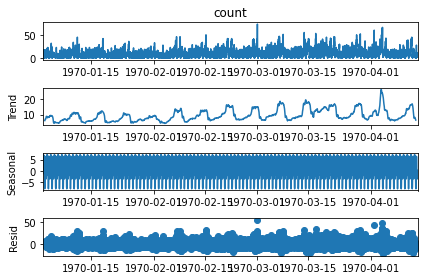

In [24]:
# Decompose the time-series to see trend, seasonality, and residuals.
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_resampled['count'], model='additive', period=96)  # period may need adjusting
result.plot()
plt.show()

Trend: Does the data show a consistent upward or downward trend? Are there any abrupt shifts?



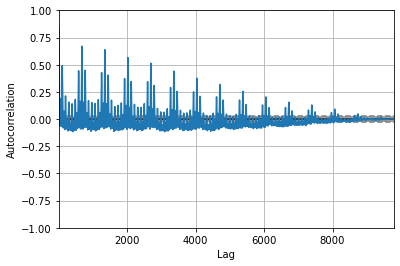

In [25]:
#Check autocorrelation to identify any daily cycles.
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_resampled['count'])
plt.show()

Seasonality: Is there a clear daily pattern? Look for regular peaks in the autocorrelation plot.
Yes

<AxesSubplot:xlabel='login_time'>

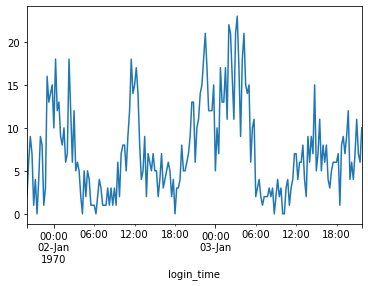

In [20]:
#zoom in
df_resampled['count'][0:200].plot(kind='line')

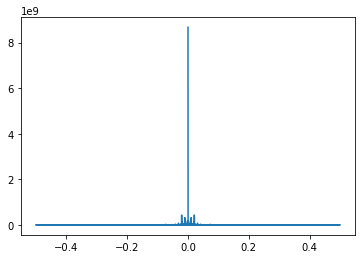

In [26]:
#Perform a Fourier transform to identify any cyclical patterns not picked up by the autocorrelation plot.
import numpy as np

fft = np.fft.fft(df_resampled['count'])
frequencies = np.fft.fftfreq(len(fft))
power_spectrum = np.abs(fft)**2

plt.plot(frequencies, power_spectrum)
plt.show()

In [ ]:
As you execute this analysis, observe:


Irregularity (Noise): Are there sudden spikes or drops that could be due to specific events?
Data Quality: Are there missing values or outliers that could affect the analysis? You can use df_resampled.isnull().sum() to check for missing values.
This approach should help you better understand the underlying patterns of demand in your data.

In [29]:
# open the  next file
with open('ultimate_data_challenge.json') as file2:
    data2 = json.load(file2)

type(data2)

list

In [30]:
# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data2)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [31]:
df.shape

(50000, 12)

experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

In [ ]:
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

In [ ]:
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [35]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [33]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [34]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [46]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [37]:
df.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

In [39]:
df.phone.isnull().sum()

396

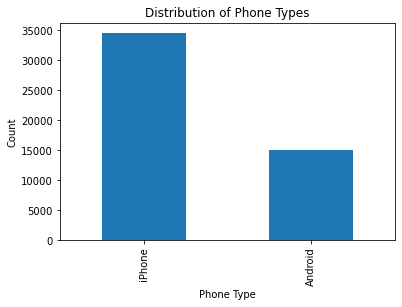

In [40]:
# Calculate the counts of each phone type
counts = df['phone'].value_counts()

# Plot a bar chart of the counts
counts.plot(kind='bar')
plt.xlabel('Phone Type')
plt.ylabel('Count')
plt.title('Distribution of Phone Types')
plt.show()

In [41]:
df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

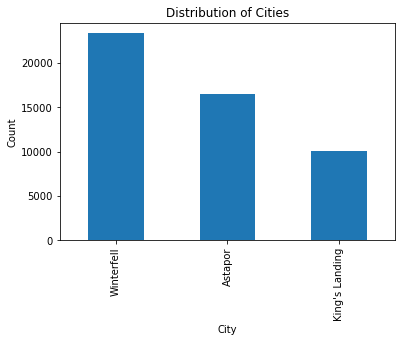

In [42]:
# Calculate the counts of each phone type
counts = df['city'].value_counts()

# Plot a bar chart of the counts
counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Cities')
plt.show()

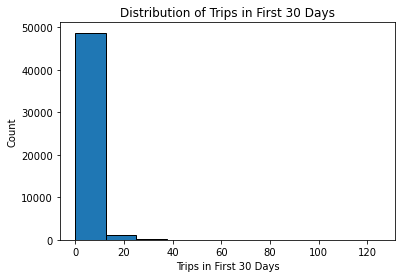

In [44]:
plt.hist(df['trips_in_first_30_days'], bins=10, edgecolor='black')
plt.xlabel('Trips in First 30 Days')
plt.ylabel('Count')
plt.title('Distribution of Trips in First 30 Days')
plt.show()

In [45]:
df.trips_in_first_30_days.describe()

count    50000.000000
mean         2.278200
std          3.792684
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

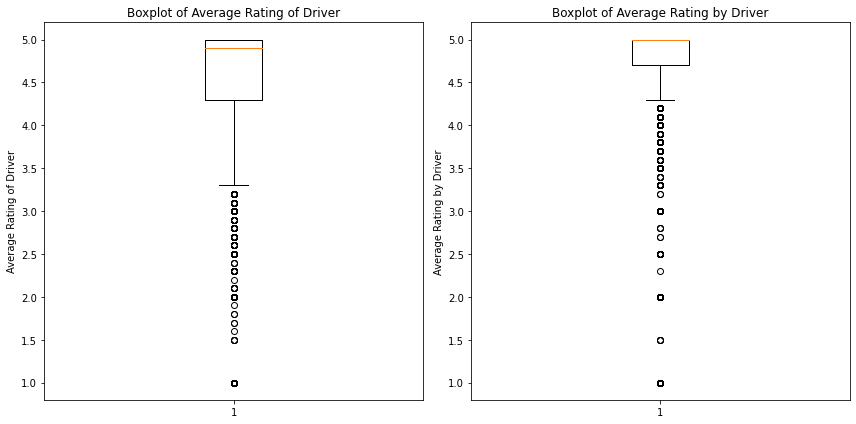

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot of 'avg_rating_of_driver'
ax[0].boxplot(df['avg_rating_of_driver'].dropna())
ax[0].set_title('Boxplot of Average Rating of Driver')
ax[0].set_ylabel('Average Rating of Driver')

# Boxplot of 'avg_rating_by_driver'
ax[1].boxplot(df['avg_rating_by_driver'].dropna())
ax[1].set_title('Boxplot of Average Rating by Driver')
ax[1].set_ylabel('Average Rating by Driver')

plt.tight_layout()
plt.show()

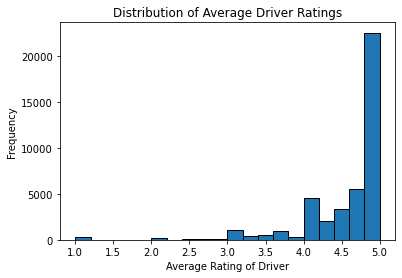

In [48]:
plt.hist(df['avg_rating_of_driver'], bins=20, edgecolor='black')
plt.xlabel('Average Rating of Driver')
plt.ylabel('Frequency')
plt.title('Distribution of Average Driver Ratings')
plt.show()

/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


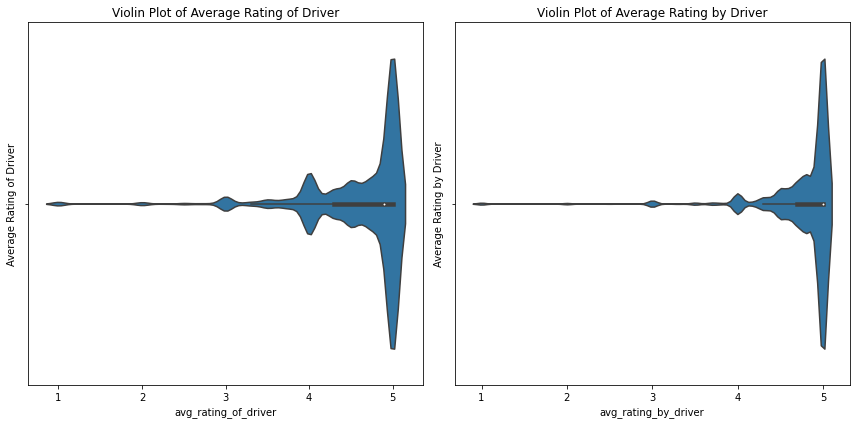

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Violin plot of 'avg_rating_of_driver'
sns.violinplot(df['avg_rating_of_driver'].dropna(), ax=ax[0])
ax[0].set_title('Violin Plot of Average Rating of Driver')
ax[0].set_ylabel('Average Rating of Driver')

# Violin plot of 'avg_rating_by_driver'
sns.violinplot(df['avg_rating_by_driver'].dropna(), ax=ax[1])
ax[1].set_title('Violin Plot of Average Rating by Driver')
ax[1].set_ylabel('Average Rating by Driver')

plt.tight_layout()
plt.show()

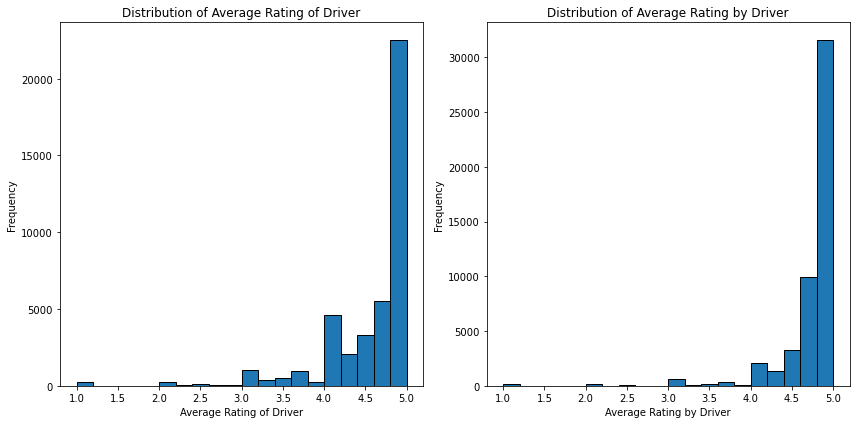

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of 'avg_rating_of_driver'
ax[0].hist(df['avg_rating_of_driver'].dropna(), bins=20, edgecolor='black')
ax[0].set_title('Distribution of Average Rating of Driver')
ax[0].set_xlabel('Average Rating of Driver')
ax[0].set_ylabel('Frequency')

# Histogram of 'avg_rating_by_driver'
ax[1].hist(df['avg_rating_by_driver'].dropna(), bins=20, edgecolor='black')
ax[1].set_title('Distribution of Average Rating by Driver')
ax[1].set_xlabel('Average Rating by Driver')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

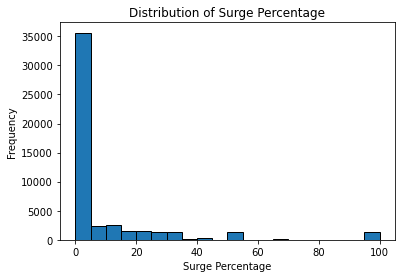

In [54]:
plt.hist(df['surge_pct'], bins=20, edgecolor='black')

plt.xlabel('Surge Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Surge Percentage')
plt.show()

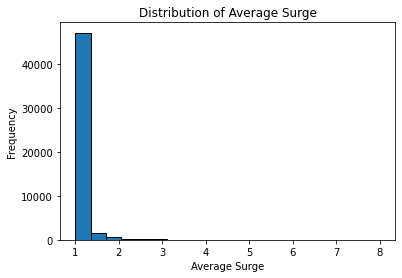

In [55]:
plt.hist(df['avg_surge'], bins=20, edgecolor='black')
plt.xlabel('Average Surge')
plt.ylabel('Frequency')
plt.title('Distribution of Average Surge')
plt.show()

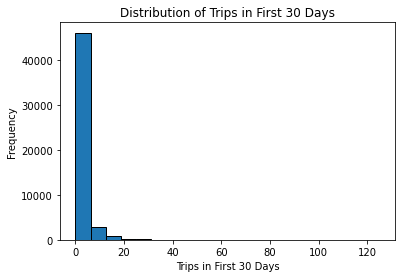

In [56]:
# Plot a histogram of the 'trips_in_first_30_days' column
plt.hist(df['trips_in_first_30_days'], bins=20, edgecolor='black')
plt.xlabel('Trips in First 30 Days')
plt.ylabel('Frequency')
plt.title('Distribution of Trips in First 30 Days')
plt.show()

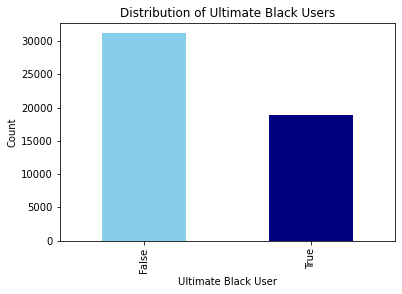

In [57]:
# Count the occurrences of each category
counts = df['ultimate_black_user'].value_counts()

# Create a bar plot
counts.plot(kind='bar', color=['skyblue', 'navy'])
plt.xlabel('Ultimate Black User')
plt.ylabel('Count')
plt.title('Distribution of Ultimate Black Users')
plt.show()

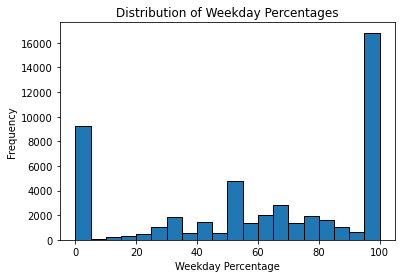

In [58]:
# Plot a histogram of the 'weekday_pct' column
plt.hist(df['weekday_pct'], bins=20, edgecolor='black')
plt.xlabel('Weekday Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Weekday Percentages')
plt.show()

In [59]:
from datetime import timedelta

# Determine the date 30 days before the last date in the dataset
cutoff_date = df['last_trip_date'].max() - timedelta(days=30)

# Create the 'active' column, where 1 means the user is active and 0 means the user is not
df['active'] = (df['last_trip_date'] > cutoff_date).astype(int)

In [61]:
# Calculate the percentage of active users
active_percentage = df['active'].mean() * 100

print(f'The percentage of active users is {active_percentage:.2f}%')


The percentage of active users is 36.62%


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_curve, roc_auc_score

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'avg_surge', 'trips_in_first_30_days', 'weekday_pct']),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder())
        ]), ['city',  'ultimate_black_user'])
    ])

# Split the data
X = df.drop(['active'], axis=1)
y = df['active']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_preprocessed, y_train)

# Predict the test data
y_pred = model.predict(X_test_preprocessed)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.87      0.79      6322
           1       0.66      0.43      0.52      3678

    accuracy                           0.71     10000
   macro avg       0.69      0.65      0.66     10000
weighted avg       0.70      0.71      0.69     10000



              precision    recall  f1-score   support

           0       0.73      0.87      0.79      6322
           1       0.66      0.43      0.52      3678

    accuracy                           0.71     10000
   macro avg       0.69      0.65      0.66     10000
weighted avg       0.70      0.71      0.69     10000

AUC Score: 0.7390733680034282


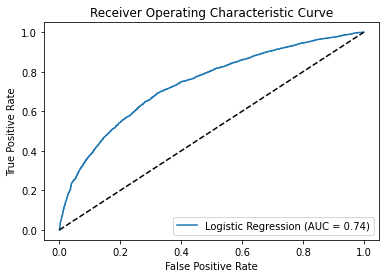

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'avg_surge', 'trips_in_first_30_days', 'weekday_pct']),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder())
        ]), ['city',  'ultimate_black_user'])
    ])

# Split the data
X = df.drop(['active'], axis=1)
y = df['active']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_preprocessed, y_train)

# Predict the test data
y_pred = model.predict(X_test_preprocessed)
y_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]  # probabilities for the positive class

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()
